In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

load_breast_cancer_dataset = load_breast_cancer()


In [2]:
#### Assignment 1: Problem 1: Question 1 Code

In [3]:
# Initializing centroids with strategy #2: pick randomly k training points as the k initial cluster centroids
def initializeCentroids(allPoints, k):
    centroids = allPoints[np.random.choice(allPoints.shape[0], k)]
    return centroids

In [4]:
# Cluster Assignment step assigns the points to the nearest centroid
# Returns the nearest centroid to each point
def clusterAssignmentStep(allPoints, centroids):
    assignedCentroids = np.empty(allPoints.shape[0])
    for i, point in enumerate(allPoints):
        # Find the distance between each data point and all the centroids at the same time
        distances = np.linalg.norm(point - centroids, axis=1)
        assignedCentroids[i] = np.argmin(distances)
    return assignedCentroids

In [5]:
# Here we move the centroids to their mean location from the points assigned to the centroid
def moveCentroidStep(allPoints, assignedCentroids, centroids):
    newLocation = []
    
    for k in range(centroids.shape[0]):
        # Find the mean location of all the points which are assigned to the current centroid
        meanLocation = allPoints[assignedCentroids==k].mean(axis=0)
        newLocation.append(meanLocation)
    return np.array(newLocation)

In [6]:
# K-means Algorithm
def kMeansClustering(dataset, k):
    # Initialize the centroids to random values
    initializedCentroids = initializeCentroids(dataset, k)
    
    centroidLocations = initializedCentroids
    assignedCentroids = 0
    
    # Storing previous Centroid locations values here
    previousCentroidLocations = np.array(0)
    
    # Loop cluster assignment and centroid relocation steps until it no longer updates the centroid location
    while(previousCentroidLocations.all() != centroidLocations.all()):
        previousCentroidLocations = centroidLocations
        assignedCentroids = clusterAssignmentStep(dataset, centroidLocations)
        centroidLocations = moveCentroidStep(dataset, assignedCentroids, centroidLocations)
    
    # Returning final cluster centroids location along with the cluster assignments for each data point
    return (centroidLocations, assignedCentroids)
    


In [7]:
#### Assignment 1: Problem 1: Question 2 Code

# For all values of k, the final cluster centroid location and the cluster assignments will be stored in this array in tuples
answer = []

for i in range(2,8):
    # ans is the tuple that holds the the final cluster centroid location and the cluster assignments for i
    ans = kMeansClustering(load_breast_cancer_dataset.data, i)
    answer.append(ans)
    
print("The final cluster centroid location and the cluster assignments are: ", answer)

'''
Justification for which data I passed as the input to the κ-means:
I passed in "load_breast_cancer_dataset.data" and the value k from the range of 2-8 as asked for as the input for the k-means algorithm.
load_breast_cancer_dataset.data contains 569 data points each with a dimension of 30. 

'''

The final cluster centroid location and the cluster assignments are:  [(array([[9.57762500e+00, 1.77433333e+01, 6.11775000e+01, 2.81123611e+02,
        9.71844444e-02, 8.19840278e-02, 4.72994306e-02, 1.82178333e-02,
        1.85155556e-01, 6.95650000e-02, 3.06106944e-01, 1.54515278e+00,
        2.09173194e+00, 1.80860417e+01, 1.03293750e-02, 2.61734583e-02,
        3.59613750e-02, 1.03038611e-02, 2.59279167e-02, 5.36447222e-03,
        1.05442917e+01, 2.28494444e+01, 6.78527778e+01, 3.39709722e+02,
        1.33410139e-01, 1.63626111e-01, 1.44578750e-01, 5.15809722e-02,
        2.74337500e-01, 8.70038889e-02],
       [1.47863984e+01, 1.95136620e+01, 9.64297787e+01, 7.09036217e+02,
        9.62408853e-02, 1.07579819e-01, 9.48113716e-02, 5.33668209e-02,
        1.80583300e-01, 6.18172233e-02, 4.19523541e-01, 1.16929296e+00,
        2.97823541e+00, 4.35605694e+01, 6.56459155e-03, 2.53774085e-02,
        3.13044378e-02, 1.20123219e-02, 1.97620885e-02, 3.56752173e-03,
        1.70985513e+01,

'\nJustification for which data I passed as the input to the κ-means:\nI passed in "load_breast_cancer_dataset.data" and the value k from the range of 2-8 as asked for as the input for the k-means algorithm.\nload_breast_cancer_dataset.data contains 569 data points each with a dimension of 30. \n\n'

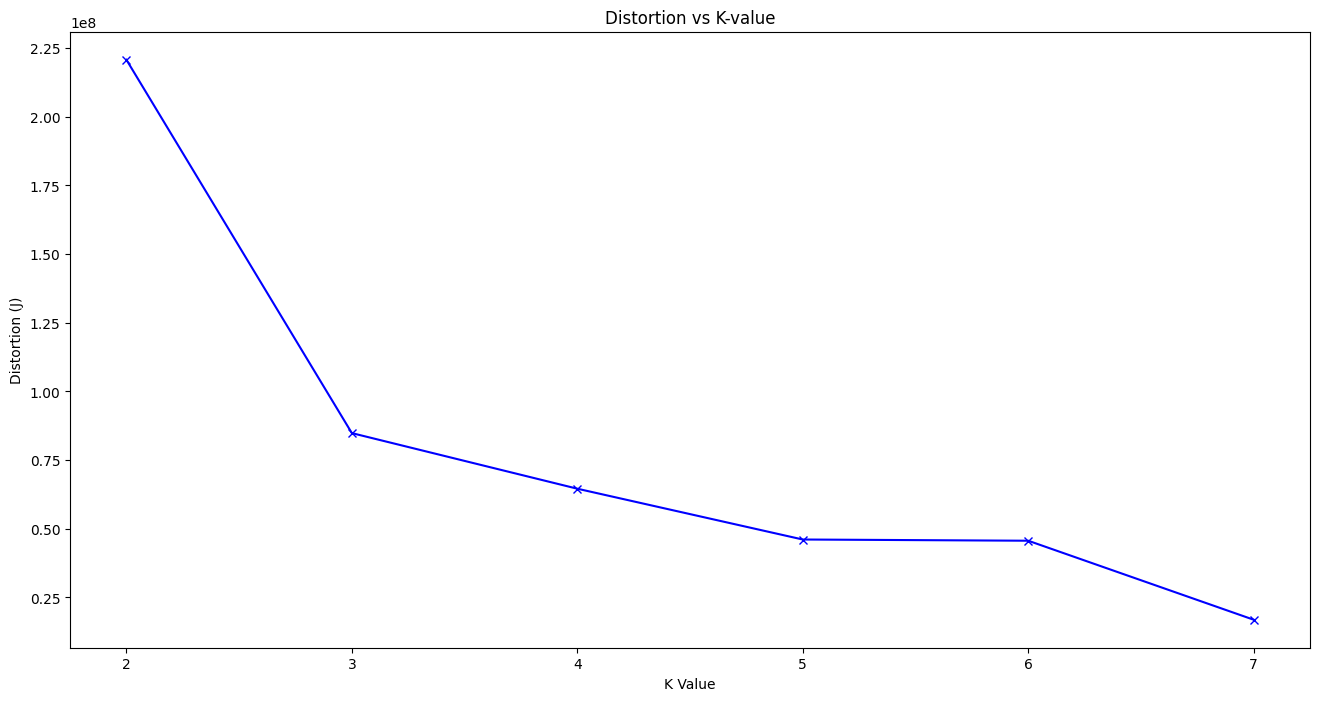

In [8]:
###  Assignment 1: Problem 1: Question 3 Code

# Plotting the distortion achieved by κ-means for values of κvarying between 2 and 7

import matplotlib.pyplot as plt
import math

allPoints = load_breast_cancer_dataset.data
distortions = []
K = range(2,8)

for i in range(6):
    centroidLocations, assignedCentroids = answer[i]
    sum = 0
    for j in range(allPoints.shape[0]):
        # Find the normalized distance squared between each point and its assigned centroid
        distance = np.linalg.norm((allPoints[j] - centroidLocations[int(assignedCentroids[j])]))**2
        sum += distance
    # Sum all of the distances and add them as distortions
    distortions.append(sum)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K Value')
plt.ylabel('Distortion (J)')
plt.title('Distortion vs K-value')
plt.show()

In [10]:
###  Assignment 1: Problem 1: Question 4
'''
If i had to pick one value of κ, I would pick k-value as 5 because at 5 the change in slope is still significant and distortion is low. The whole point is to minimize 
distortions to a certain value which is why at 5 the distortions are minimized and this is good number of cluster to assign. A lower k value means higher 
distortion and a higher k value the change is slope is not significant to justify. This is why 5 is my chosen k value.
'''

'\nIf i had to pick one value of κ, I would pick k-value as 5 because at 5 the change in slope is still significant and distortion is low. The whole point is to minimize \ndistortions to a certain value which is why at 5 the distortions are minimized and this is good number of cluster to assign. A lower k value means higher \ndistortion and a higher k value the change is slope is not significant to justify. This is why 5 is my chosen k value.\n'